In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
folder = '../../Dataset/Five_TestDataset'
img_paths = []
pred_paths = []
gt_paths = []
sample_num = 2

for root, dirs, files in os.walk(folder, topdown=False): #finds MRI files
    for name in files:
        if name.endswith(".png"):
            gt_path=os.path.join(root, name)
            gt_paths.append(gt_path)
            pred_path = gt_path.replace('labels','images')
            gt_paths.append(gt_path)



In [2]:
def color(img_path,pred_path,gt_path):

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

  
    img1 = (cv2.imread(pred_path)>128).astype(np.int8)*255
    img2 = (cv2.imread(gt_path)>128).astype(np.int8)*255
   
    # img = np.zeros(img1.shape,dtype='uint8')

    img1 = img1[:,:,0]
    img2 = img2[:,:,0]
    
    # print(((img1==0)|(img1==255)).all())
    # print(((img2==0)|(img2==255)).all())
    idx_TP = np.where((img1==255) & (img2==255))
    idx_TN = np.where((img1==0) & (img2==0))
    idx_FP = np.where((img1==255) & (img2==0))
    idx_FN = np.where((img1==0) & (img2==255))

    img[idx_TP] = (0,255,0)

    # img[idx_TN] = (0,0,0)

    img[idx_FP] = (255,0,0)
    img[idx_FN] = (255,255,0)

    return img

In [3]:
def color_no_pred(img_path,gt_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

  
    img2 = (cv2.imread(gt_path)>128).astype(np.int8)*255
   
    # img = np.zeros(img1.shape,dtype='uint8')

    img2 = img2[:,:,0]
    
    # print(((img1==0)|(img1==255)).all())
    # print(((img2==0)|(img2==255)).all())

    idx = np.where(img2==255)

    img[idx] = (255,255,0)

    return img

In [5]:
# path0 = '../../../Dataset/Five_TestDataset/CVC-300/images/149.png'
# path1 = '../../../Dataset/Five_TestDataset/CVC-ColonDB/masks/4.png'
# path2 = '../../../Dataset/Five_TestDataset/CVC-ColonDB/masks/5.png'


# root = '/data1/Huqiang/polyp-segmentation/Polyp-PVT/result_map/comparison/sotas'
# root = '/data1/Huqiang/polyp-segmentation/Polyp-PVT/result_map/ablation_study'
root = '/data1/Huqiang/polyp-segmentation/Polyp-PVT/result_map/full_mix_supervised/result_map'
# root1 = '../../BoxPolyp-main/evaluate/prediction/BoxPolyp-Pvt'
root_img = '../../../Dataset/Five_TestDataset'
save_path = root.replace('result_map','keshihua')
# save_path = '/data1/Huqiang/polyp-segmentation/Polyp-PVT/result_map/ablation_study/keshihua'
sotas = []
for name in os.listdir(root):
    sotas.append(name)

for sota in sotas:
# sota = sotas[-1]
    for folder in ['CVC-300', 'CVC-ClinicDB', 'CVC-ColonDB', 'ETIS-LaribPolypDB', 'Kvasir']:
        for name in os.listdir(root+'/'+sota+'/'+folder):
            pred_path = root+'/'+sota+'/'+folder+'/'+ name

            img_path = root_img+'/'+folder+'/'+'images/'+name
            
            gt_path = root_img+'/'+folder+'/'+'masks/'+name
            # save = save_path+'/'+'boxpolyp'+'/'+folder
            save = save_path+'/'+sota+'/'+folder
            img_color = color(img_path,pred_path,gt_path)
            # plt.imshow(img_color)
            # plt.show()
            img_color = cv2.cvtColor(img_color,cv2.COLOR_BGR2RGB)
            
            os.makedirs(save, exist_ok=True)
            cv2.imwrite(save+'/'+name,img_color)



In [ ]:
# root = '/data1/Huqiang/polyp-segmentation/Polyp-PVT/result_map/comparison/sotas'
# # root1 = '../../BoxPolyp-main/evaluate/prediction/BoxPolyp-Pvt'
# root_img = '../../../Dataset/Five_TestDataset'
# # save_path = root.replace('sotas','keshihua')
# save_path = '/data1/Huqiang/polyp-segmentation/Polyp-PVT/result_map/comparison/keshihua'

# sotas = ['boxinst']

root = '/data1/Huqiang/polyp-segmentation/Polyp-PVT/result_map/full_mix_supervised/result_map'
# root1 = '../../BoxPolyp-main/evaluate/prediction/BoxPolyp-Pvt'
root_img = '../../../Dataset/Five_TestDataset'
save_path = '/data1/Huqiang/polyp-segmentation/Polyp-PVT/result_map/full_mix_supervised/keshihua'
# save_path = '/data1/Huqiang/polyp-segmentation/Polyp-PVT/result_map/ablation_study/keshihua'
# sotas = []
# for name in os.listdir(root):
#     sotas.append(name)

sotas = ['Ours_noLD']

for sota in sotas:
    for folder in ['CVC-300', 'CVC-ClinicDB', 'CVC-ColonDB', 'ETIS-LaribPolypDB', 'Kvasir']:
        for name in os.listdir(root_img+'/'+folder+'/images'):
         
            img_path = root_img+'/'+folder+'/'+'images/'+name
            
            gt_path = root_img+'/'+folder+'/'+'masks/'+name

            pred_path = root+'/'+sota+'/'+folder+'/'+ name
            if os.path.exists(pred_path):
            # save = save_path+'/'+'boxpolyp'+'/'+folder
                img_color = color(img_path,pred_path,gt_path)
            else:
                img_color = color_no_pred(img_path,gt_path)
            # plt.imshow(img_color)
            # plt.show()

            img_color = cv2.cvtColor(img_color,cv2.COLOR_BGR2RGB)

            save = save_path+'/'+sota+'/'+folder
            os.makedirs(save, exist_ok=True)
            cv2.imwrite(save+'/'+name,img_color)


In [11]:
datapath = '../../BoxPolyp-main/dataset/LDPolypVideo'
ratio = 0.1
total = 160

folders = []
for folder in os.listdir(datapath+'/mask'):
    folders.append(folder)

folders_chosed = random.sample(folders,int(ratio*160))

for folder in folders_chosed:
    for name in os.listdir(datapath+'/mask/'+folder):
        path = ['../../../Dataset/LDPolypVideo/images/'+folder+'/'+name.replace('.png', '.jpg'), datapath+'/mask/'+folder+'/'+name]
        break
    break

img = cv2.imread(path[1])


In [ ]:
pred_path = '/data1/Huqiang/polyp-segmentation/Polyp-PVT/result_map/full_mix_supervised/keshihua.png'

gt_path = '../../../Dataset/Five_TestDataset/ETIS-LaribPolypDB/masks/18.png'
img_path = '../../../Dataset/Five_TestDataset/ETIS-LaribPolypDB/images/18.png'

img = cv2.imread(img_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


img1 = (cv2.imread(pred_path)>128).astype(np.int8)*255
img1 = img1[:,:,0]
img1 = cv2.resize(img1,(1225,966))

img1 = (img1>100).astype(np.int8)*255

# img1 = (cv2.imread(pred_path)>128).astype(np.int8)
# img1 = img1[:,:,0]
# shape1 = img1.shape
# shape2 = [966,1225]
# ratio = min(float(shape2[i])/(shape1[i]) for i in range(len(shape1)))
# new_size = tuple([int(i*ratio)for i in shape1])
# img1 = cv2.resize(img1,(new_size[1],new_size[0]))
# pad_w = shape2[1] - new_size[1]
# pad_h = shape2[0] - new_size[0]
# top,bottom = pad_h//2, pad_h-(pad_h//2)
# left,right = pad_w//2, pad_w -(pad_w//2)
# img1 = cv2.copyMakeBorder(img1,top,bottom,left,right,cv2.BORDER_CONSTANT,None,(0,0)) 


img2 = (cv2.imread(gt_path)>128).astype(np.int8)*255

# img = np.zeros(img1.shape,dtype='uint8')


img2 = img2[:,:,0]

# print(((img1==0)|(img1==255)).all())
# print(((img2==0)|(img2==255)).all())
idx_TP = np.where((img1==255) & (img2==255))
idx_TN = np.where((img1==0) & (img2==0))
idx_FP = np.where((img1==255) & (img2==0))
idx_FN = np.where((img1==0) & (img2==255))

img[idx_TP] = (0,255,0)

# img[idx_TN] = (0,0,0)

img[idx_FP] = (255,0,0)
img[idx_FN] = (255,255,0)

plt.imshow(img)
plt.show()

img_color = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
cv2.imwrite('../keshihua/1.png',img_color)


: 

In [18]:
def scale(img, long_size,short_size):
    h, w = img.shape

    a = short_size - h
    b = long_size - w

    if a > 0:
        img = np.pad(img,((0,a),(0,0)),"constant",constant_values=0)
    if b> 0:
        img = np.pad(img, ((0, 0), (0, b)), "constant", constant_values=0)

    h2, w2 = img.shape
    scale = short_size * 1.0 / h2
    scale2 = long_size*1.0/w2
    img = cv2.resize(img, dsize=None, fx=scale2, fy=scale)
    print(img.shape)
    return img

In [52]:
img1 = (cv2.imread(pred_path)>128).astype(np.int8)*255
img1 = img1[:,:,0]
shape1 = img1.shape
shape2 = [966,1225]
ratio = min(float(shape2[i])/(shape1[i]) for i in range(len(shape1)))
new_size = tuple([int(i*ratio)for i in shape1])
img1 = cv2.resize(img1,(new_size[1],new_size[0]))
pad_w = shape2[1] - new_size[1]
pad_h = shape2[0] - new_size[0]
top,bottom = pad_h//2, pad_h-(pad_h//2)
left,right = pad_w//2, pad_w -(pad_w//2)
img1 = cv2.copyMakeBorder(img1,top,bottom,left,right,cv2.BORDER_CONSTANT,None,(0,0)) 


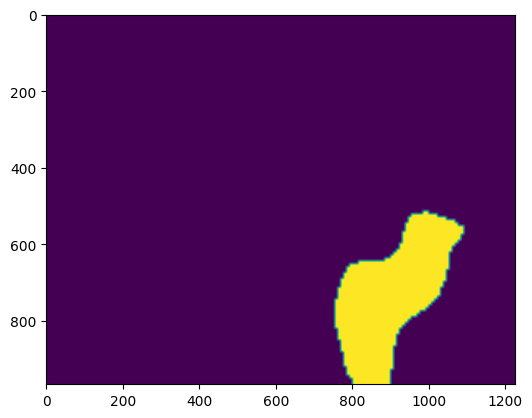

In [53]:
plt.imshow(img1)